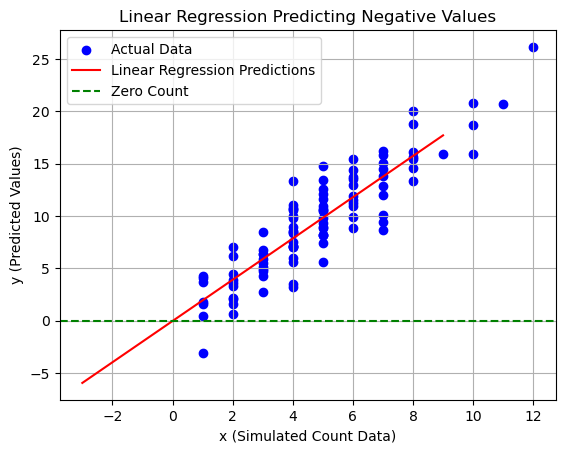

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulating count data
np.random.seed(0)
x = np.random.poisson(5, 100)  # Simulating count data with a Poisson distribution
y = 2 * x + np.random.normal(0, 2, 100)  # Adding some noise

# Linear Regression Model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Predictions including negative values
x_test = np.array(range(-3, 10))  # Including negative values to illustrate the issue
y_pred = model.predict(x_test.reshape(-1, 1))

# Plotting
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x_test, y_pred, color='red', label='Linear Regression Predictions')
plt.axhline(0, color='green', linestyle='--', label='Zero Count')
plt.xlabel('x (Simulated Count Data)')
plt.ylabel('y (Predicted Values)')
plt.title('Linear Regression Predicting Negative Values')
plt.legend()
plt.grid(True)
plt.show()

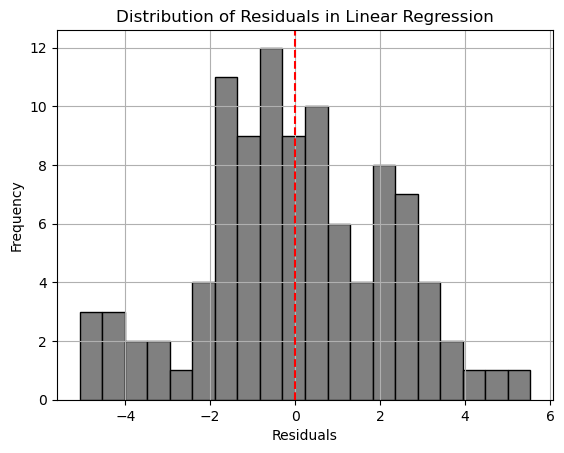

In [2]:
# Calculating residuals
y_pred_actual = model.predict(x.reshape(-1, 1))
residuals = y - y_pred_actual

# Plotting residuals
plt.hist(residuals, bins=20, color='grey', edgecolor='black')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals in Linear Regression')
plt.grid(True)
plt.show()

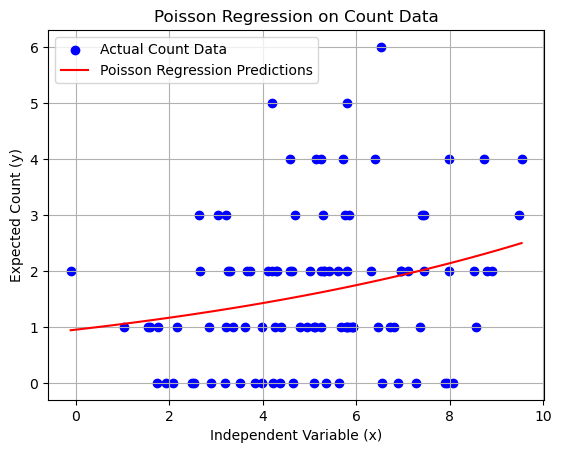

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulating count data
np.random.seed(0)
x = np.random.normal(5, 2, 100)  # Independent variable data
y = np.random.poisson(np.exp(x * 0.1))  # Simulated count data

# Poisson Regression Model
exog, endog = sm.add_constant(x), y
poisson_model = sm.GLM(endog, exog, family=sm.families.Poisson()).fit()

# Predictions and plot
x_test = np.linspace(min(x), max(x), 100)
y_pred = poisson_model.predict(sm.add_constant(x_test))

plt.scatter(x, y, color='blue', label='Actual Count Data')
plt.plot(x_test, y_pred, color='red', label='Poisson Regression Predictions')
plt.xlabel('Independent Variable (x)')
plt.ylabel('Expected Count (y)')
plt.title('Poisson Regression on Count Data')
plt.legend()
plt.grid(True)
plt.show()